# Section 16.7

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
sns.set(font_scale=2)

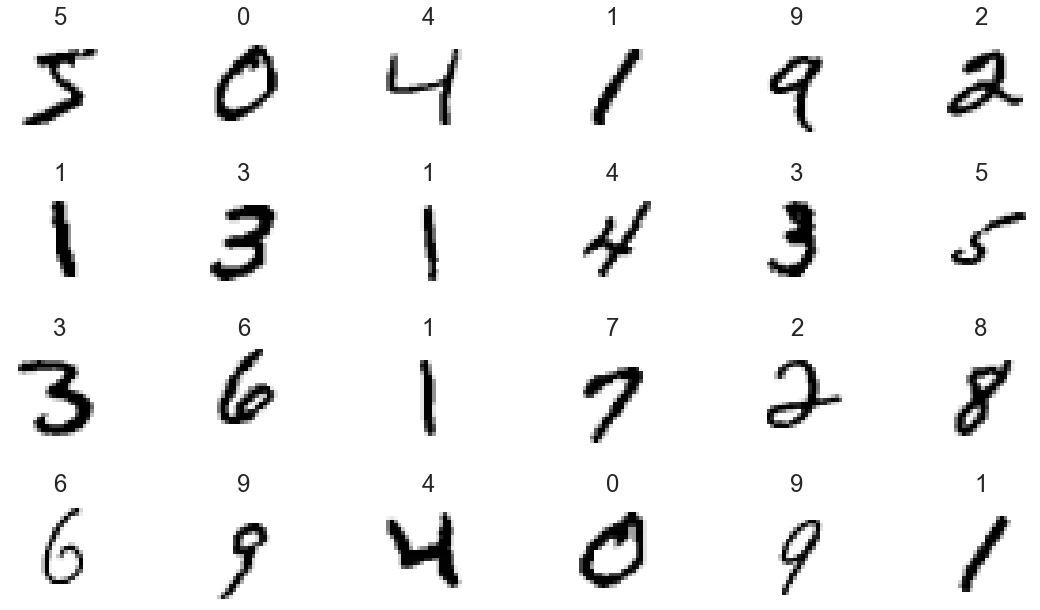

In [11]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_train = X_train.astype('float32') / 255

In [15]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [16]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
X_test = X_test.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train)

In [20]:
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [22]:
y_test = to_categorical(y_test)

In [23]:
y_test.shape

(10000, 10)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
cnn = Sequential()

In [26]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [27]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [28]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [29]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [55]:
cnn.add(Flatten())

In [56]:
cnn.add(Dense(units=4096, activation='relu'))

In [57]:
cnn.add(Dense(units=128, activation='relu'))

In [58]:
cnn.add(Dense(units=10, activation='softmax'))

In [59]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                32010     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0

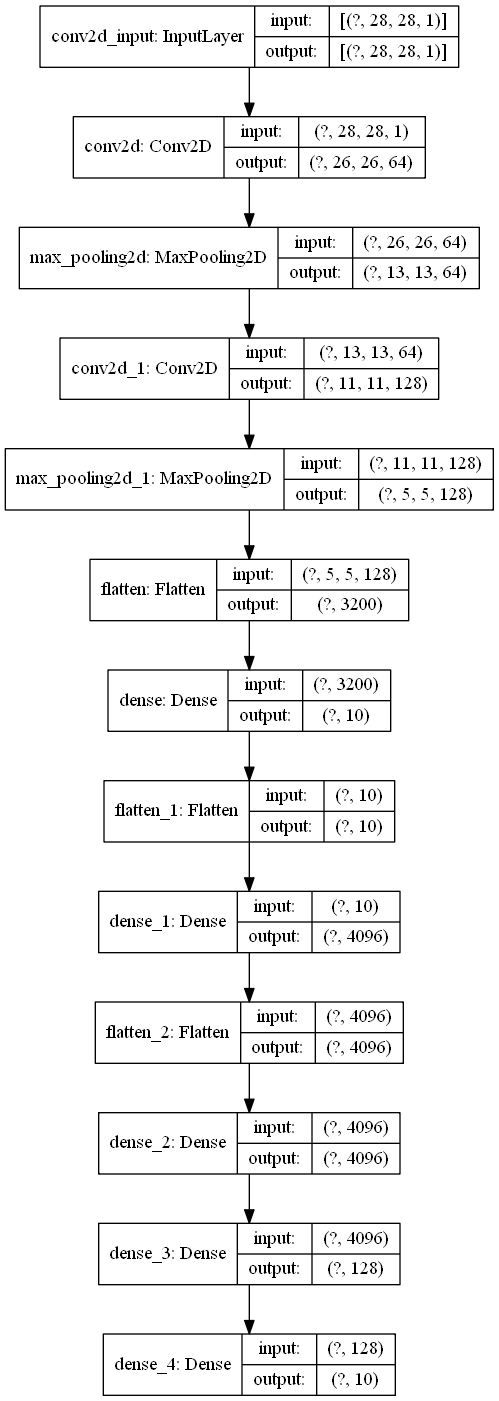

In [60]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

In [61]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [62]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 355s 421ms/step - loss: 0.0559 - accuracy: 0.9916 - val_loss: 0.0797 - val_accuracy: 0.9877
Epoch 2/5
844/844 [==============================] - 355s 421ms/step - loss: 0.0354 - accuracy: 0.9933 - val_loss: 0.0678 - val_accuracy: 0.9890
Epoch 3/5
844/844 [==============================] - 354s 419ms/step - loss: 0.0314 - accuracy: 0.9938 - val_loss: 0.0615 - val_accuracy: 0.9900
Epoch 4/5
844/844 [==============================] - 352s 417ms/step - loss: 0.0260 - accuracy: 0.9943 - val_loss: 0.0460 - val_accuracy: 0.9915
Epoch 5/5
844/844 [==============================] - 351s 416ms/step - loss: 0.0211 - accuracy: 0.9951 - val_loss: 0.0638 - val_accuracy: 0.9893


In [63]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 16s 51ms/step - loss: 0.0680 - accuracy: 0.9869


In [64]:
loss

0.06800445914268494

In [65]:
accuracy

0.9868999719619751

In [66]:
predictions = cnn.predict(X_test)
len(predictions)

10000

In [67]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [68]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000001%
1: 0.0000687120%
2: 0.0002363172%
3: 0.0000597298%
4: 0.0000131989%
5: 0.0000000501%
6: 0.0000002171%
7: 99.9993801117%
8: 0.0000031172%
9: 0.0002405630%


In [69]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [70]:
len(incorrect_predictions)

131

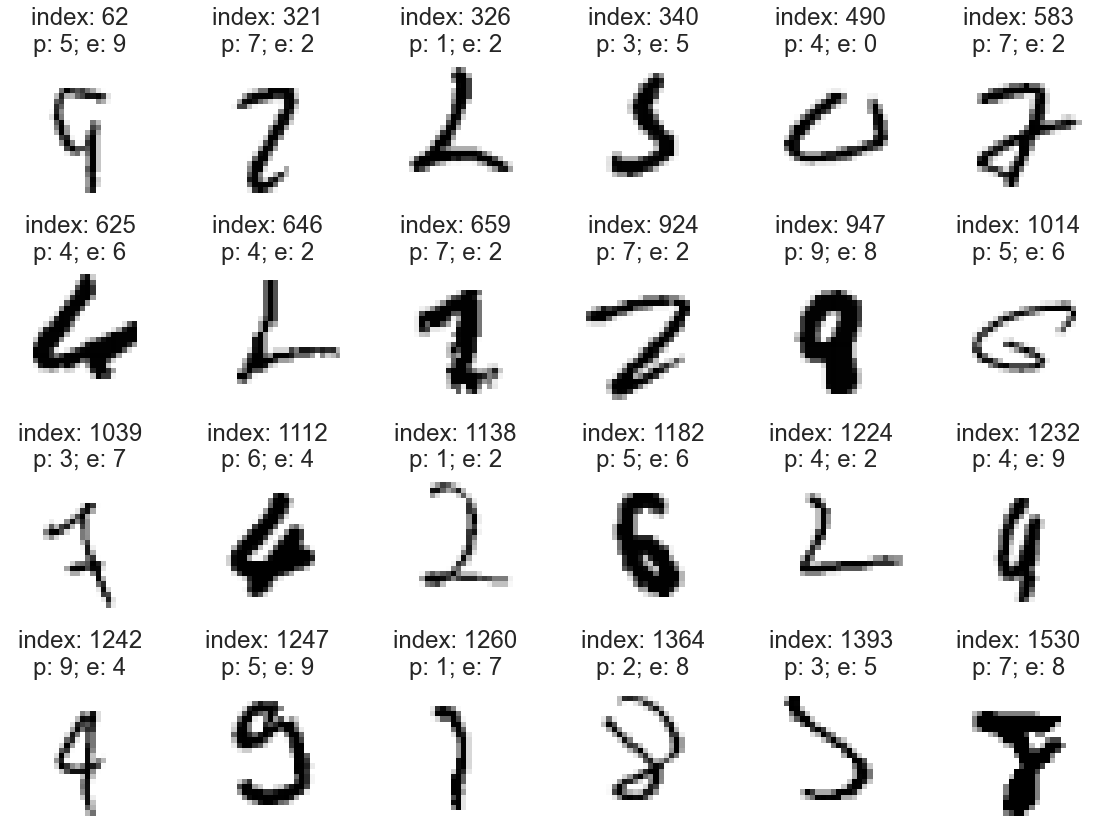

In [71]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [72]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [73]:
display_probabilities(predictions[495])

0: 1.1658297852%
1: 0.1788596273%
2: 0.6571246311%
3: 0.6632667966%
4: 0.5857789889%
5: 1.5237324871%
6: 25.8770316839%
7: 0.9904942475%
8: 67.5566971302%
9: 0.8011740632%


In [74]:
display_probabilities(predictions[583])

0: 0.0007562076%
1: 0.1960128546%
2: 9.0129718184%
3: 0.1397950691%
4: 0.0296367420%
5: 0.0029229721%
6: 0.0067330606%
7: 89.8517906666%
8: 0.0243325994%
9: 0.7350422908%


In [75]:
display_probabilities(predictions[625])

0: 0.0356302131%
1: 0.0145419093%
2: 0.2273018006%
3: 0.0414406270%
4: 96.3701367378%
5: 0.0409855711%
6: 0.6449888460%
7: 0.5602018442%
8: 0.1385182492%
9: 1.9262578338%


In [76]:
cnn.save('mnist_cnn.h5')

In [77]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################